In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score , mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("C:/Users/Kartik/Downloads/advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Visualisation

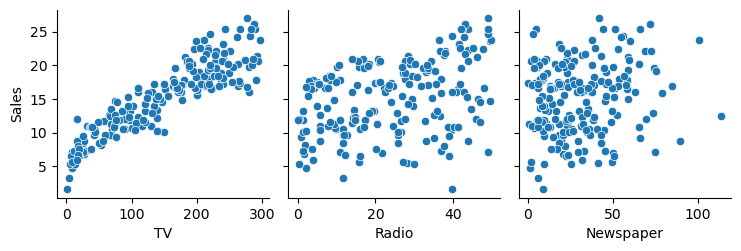

In [5]:
sns.pairplot(df , x_vars = ["TV" ,"Radio", "Newspaper"], y_vars = ["Sales"])


<Axes: >

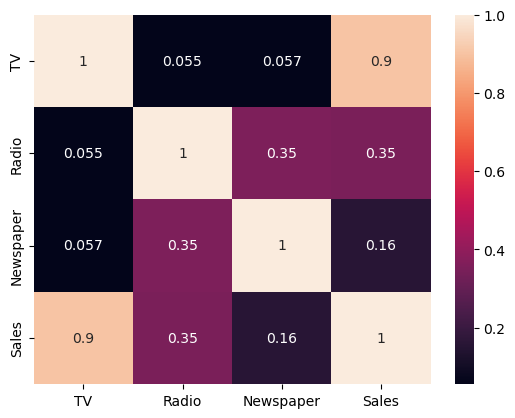

In [6]:
sns.heatmap(df.corr(), annot = True)

## Feature Engineering

In [7]:
minmax = MinMaxScaler()
df1 = minmax.fit_transform(df)
df1 = pd.DataFrame(df1 , columns = df.columns)

In [8]:
df1

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.488189
197,0.596212,0.187500,0.053650,0.519685
198,0.956713,0.846774,0.579595,0.940945


## Model Training and Prediction

In [9]:
Y = df1["Sales"]
X = df1.iloc[:,:3]

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y)

In [11]:
model1 = LinearRegression()

In [12]:
model1.fit(Xtrain,Ytrain)

LinearRegression()

In [13]:
print(model1.coef_)
print(model1.intercept_)

[ 0.62864622  0.2115162  -0.00820065]
0.1266197856163624


In [14]:
coeff_df = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
TV,0.628646
Radio,0.211516
Newspaper,-0.008201


In [15]:
Ytrainpred  = model1.predict(Xtrain)

In [16]:
print("Training Accuracy:",r2_score(Ytrain,Ytrainpred))

Training Accuracy: 0.8860868523257394


In [17]:
mean_squared_error(Ytrain,Ytrainpred)

0.004504468443644592

## Training data Plot

Text(0, 0.5, 'Sales')

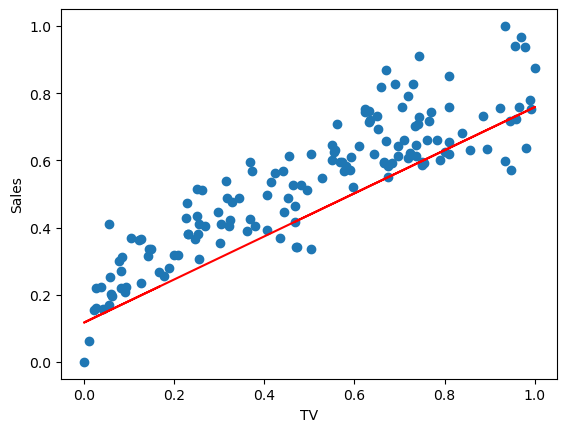

In [25]:
plt.scatter(Xtrain["TV"],Ytrain)
plt.plot(Xtrain["TV"], 0.64147574*Xtrain["TV"] + 0.11702499523881332 , "r")
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

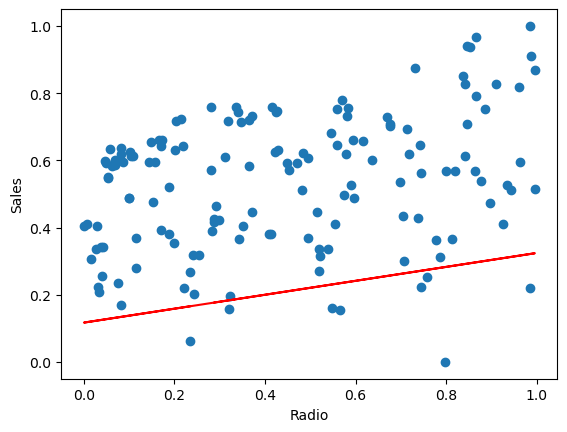

In [27]:
plt.scatter(Xtrain["Radio"],Ytrain)
plt.plot(Xtrain["Radio"], 0.20723639*Xtrain["Radio"] + 0.11702499523881332 , "r")
plt.xlabel("Radio")
plt.ylabel("Sales")

## Model Testing

In [20]:
Ytestpred = model1.predict(Xtest)

In [21]:
print("Testing Accuracy:",r2_score(Ytest,Ytestpred))

Testing Accuracy: 0.9383875105700202


In [22]:
mean_squared_error(Ytest,Ytestpred)

0.003302849631465226

## Testing data Plot

Text(0, 0.5, 'Sales')

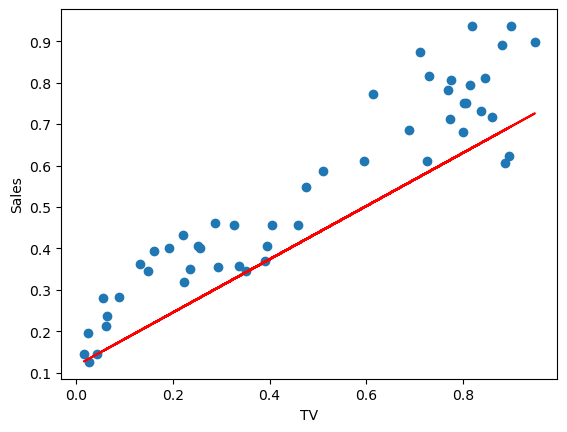

In [28]:
plt.scatter(Xtest["TV"],Ytest)
plt.plot(Xtest["TV"], 0.64147574*Xtest["TV"] + 0.11702499523881332 , "r" )
plt.xlabel("TV")
plt.ylabel("Sales")